# DS Practicum 3: Ava Wagner, Jason Reed, Julianne Conlee, Benoit Schiermeier

# Question 1: The DS Problem

The DS problem at hand is to apply data science and machine learning techniques to clean, explore, and build a model. Our group selected dataset #2, which focuses on the factors that could influence the prevalence of diabetes or prediabtes. Hence, the main problem at hand is to build a classification model that can predict a person's status regarding diabetes. The target variable, Diabetes_012, has three possible classifications:

- Diabetic
- Pre-diabetic
- No diabetes

By determining which features have the most influence in correlation to diabetes, the more accurate the model will be. The model could be very important in the medical industry for identifying diabetes in earlier stages, by knowing which features correlate with the diagnosis the most.

# Question 2: Prepare the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [2]:
#check the frequency of null values in each column
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [3]:
#handle missing data
df = df.dropna()

In [4]:
# check for duplicate rows
duplicate_rows = df.duplicated().sum()
duplicate_rows # = 238999
# Drop duplicates
df.drop_duplicates(inplace=True)

In [5]:
# Check datatypes
df.dtypes
# Convert to correct datatypes
df['Diabetes_012'] = df['Diabetes_012'].astype('category')
df['HighBP'] = df['HighBP'].astype('int')
df['HighChol'] = df['HighChol'].astype('int')
df['CholCheck'] = df['CholCheck'].astype('int')
df['BMI'] = df['BMI'].astype('int')
df['Smoker'] = df['Smoker'].astype('int')
df['Stroke'] = df['Stroke'].astype('int')
df['HeartDiseaseorAttack'] = df['HeartDiseaseorAttack'].astype('int')
df['PhysActivity'] = df['PhysActivity'].astype('int')
df['Fruits'] = df['Fruits'].astype('int')
df['Veggies'] = df['Veggies'].astype('int')
df['HvyAlcoholConsump'] = df['HvyAlcoholConsump'].astype('int')
df['AnyHealthcare'] = df['AnyHealthcare'].astype('int')
df['NoDocbcCost'] = df['NoDocbcCost'].astype('int')
df['GenHlth'] = df['GenHlth'].astype('int')
df['MentHlth'] = df['MentHlth'].astype('int')
df['PhysHlth'] = df['PhysHlth'].astype('int')
df['DiffWalk'] = df['DiffWalk'].astype('int')
df['Sex'] = df['Sex'].astype('int')
df['Age'] = df['Age'].astype('int')
df['Education'] = df['Education'].astype('int')
df['Income'] = df['Income'].astype('int')

# Question 3: Perform EDA

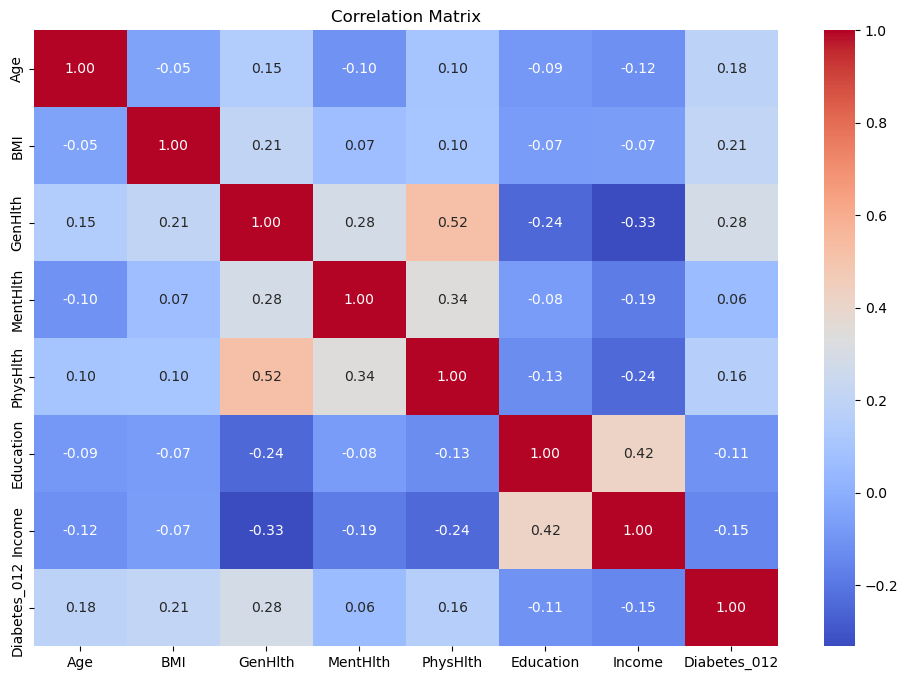

In [6]:
# Correlation between numeric features and target variable
correlation_matrix = df[['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Education', 'Income', 'Diabetes_012']].corr()

# Display heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

# Analysis of Correlation Matrix
The matrix contains many different correlation values, but I will highlight the most important for the practicum:

GenHlth and PhysHlth had the hgihest correlation, 0.52, which makes sense. Lower scores for both mean the person is healthy, while higher scores indicate poor health. Hence, as PhysHlth is worse, so is GenHlth typically
Education and Income had the next highest correlation with 0.42. Again, this makes sense as those with higher incomes tend to have better education.

It is imperative to know which features correlate with the target vairable, Diabetes_012, as well

GenHlth has the highest correlation with the target variable, with a score of 0.28. This makes sense as those with higher GenHlth scores mean they are less fit, which means they are more likely to have diabetes.
BMI has the next highest correlation ,with a value of 0.21. Again, this makes perfect sense as though with a higher body mass index would be more likely to have diabetes.
The third highest correlation with the target variable is age, with a score fo 0.18. Data has shown the risk of diabetes is greater as age increases, so correlation makes sense here, albeit low.

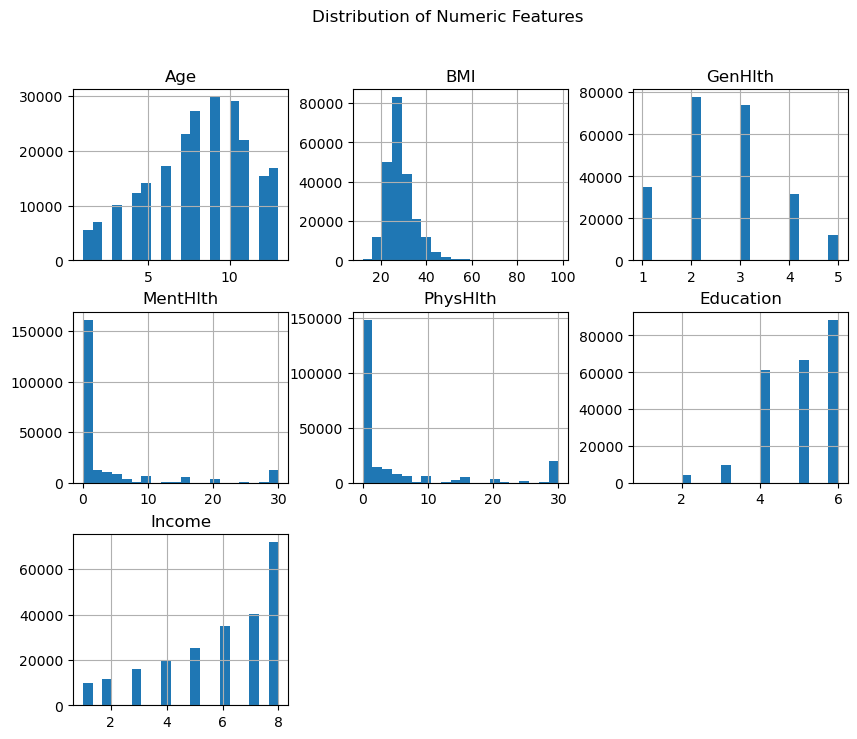

In [7]:
# Plot histogram to show distribution for numeric variables
df[['Age', 'BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Education', 'Income']].hist(figsize=(10, 8), bins=20)
plt.suptitle('Distribution of Numeric Features')
plt.show()

# Analysis of Distributions of Numeric Features
The distributions help reveal information about the group of people surveyed for data

Age - The demographic is right skewed, meaning primarily older people were surveyed for the data.
BMI - The BMI data is primarily within the 18-30 range, which is aroudn the average for people. However, it is right skewed, as shown by the longer tail on the right.
GenHlth -
MentHlth & PhysHlth - These distributions are extremely similar for the two features. Almost all people report being physically and mentally healthy for almost all days of the month. This causes a major right skew. Many did report being unhealthy to close to all 30 days of the month as well.
Education - Left skewed, which reveals higher educated people were surveyed. A vast majority of the people have at least completed high school. With over two thirds of this group also attending college.
Income - Like education, also skewed left, which shows most people have a steady and reliable income.

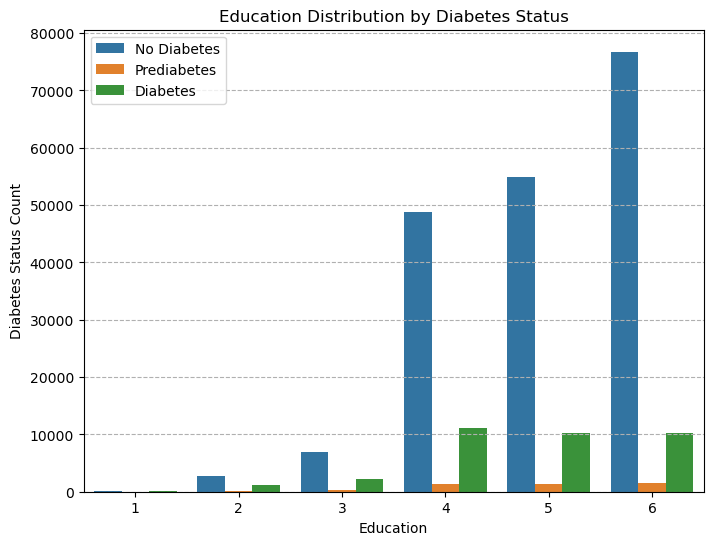

In [8]:
# Education vs. Diabetes_012
plt.figure(figsize = (8, 6))
sns.countplot(df, x = 'Education', hue = 'Diabetes_012')
plt.title('Education Distribution by Diabetes Status')
plt.xlabel('Education')
plt.ylabel('Diabetes Status Count')
plt.grid(True, axis = 'y', linestyle = '--')
plt.legend(labels = ['No Diabetes', 'Prediabetes', 'Diabetes'])
plt.show()

# Analysis of Education Distribution by Diabetes Status
From left to right, the level of education increases. The most major takeaway from this graph is that as people become more educated, there is a smaller proportion of people who have or show signs of diabetes.

Level 1 values appear practically even, which shows those who never attended school have a high chance of diabetes.
About a third of those who compelted grades 1-8, have or shown signs of diabetes
Roughly a quarter of those who finished between grades 9-11 have diabetes or prediabetes Already we can see a lower proportion as education increases.
A massive population jump occurs for those who have completed high school, where now it is a but over a fifth of those people have prediabetes or diabetes. This group had the highest overall diabetes count, despite the next two groups holding much higher population counts.
Levels 5 and 6 are for individuals who have completed or attended college, and both levels have the lowest proportion of people with diabetes. Level 6 especially, as a bit under an eighth of people have diabetes, which is much imporved from before. These two levels show that despite having more people, the higher education combats against diabetes.

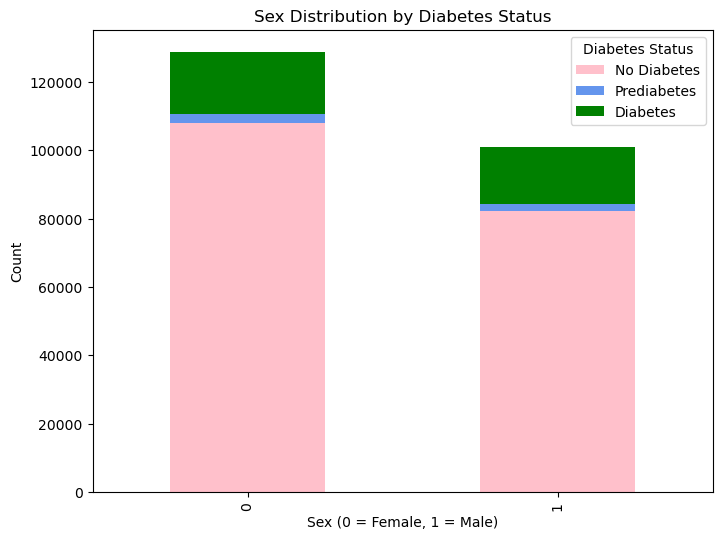

In [9]:
# Sex vs. Diabetes_012
# Calculate sex per diabetes status
sex_diabetes_counts = df.groupby(['Sex', 'Diabetes_012']).size().unstack()

# Plot a stacked bar plot
sex_diabetes_counts.plot(kind = 'bar', stacked = True, figsize = (8, 6), color = ['Pink', 'CornflowerBlue', 'Green'])
plt.title('Sex Distribution by Diabetes Status')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title = 'Diabetes Status', labels = ['No Diabetes', 'Prediabetes', 'Diabetes'])
plt.show()

# Analysis of Sex Distribution by Diabetes Status
The graph helps show that roughly 25,000 more females were surveyed than males. Roughly 10% more females have prediabetes or diabetes, but there are about 20% more females surveyed, which shows that males showed higher signs of having diabetes.

~16% of females have diabetes
~19% of males have diabetes
Therefore, males are slightly more likely to have prediabetes or diabetes based on the data, but it is not a massive difference.

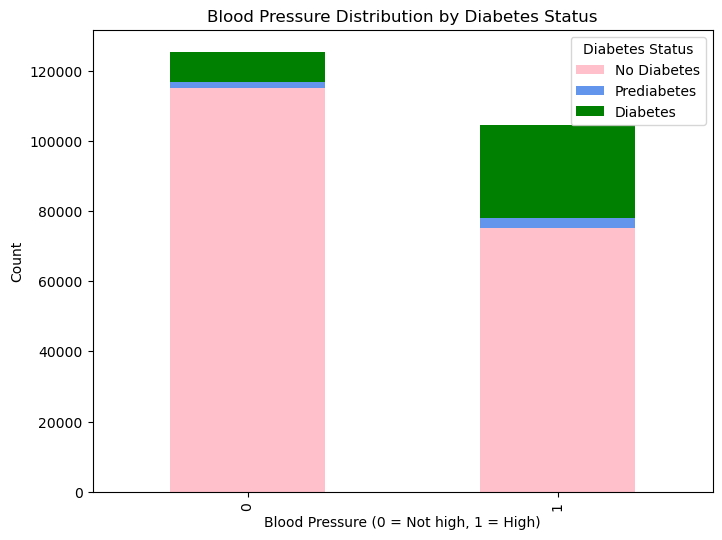

In [10]:
# HighBP vs. Diabetes_012
# Calculate bp per diabetes status
highbp_count = df.groupby(['HighBP', 'Diabetes_012']).size().unstack()

# Plot a stacked bar plot
highbp_count.plot(kind = 'bar', stacked = True, figsize = (8, 6), color = ['Pink', 'CornflowerBlue', 'Green'])
plt.title('Blood Pressure Distribution by Diabetes Status')
plt.xlabel('Blood Pressure (0 = Not high, 1 = High)')
plt.ylabel('Count')
plt.legend(title='Diabetes Status', labels=['No Diabetes', 'Prediabetes', 'Diabetes'])
plt.show()

# Analysis of Blood Pressure Distribution by Diabetes Status
This graph is extremely telling in how high blood pressure affects one's diabetes status. While the overall number of people without high blood pressure is higher, a significantly larger proportion of those with diabetes have high blood pressure. Those with high blood pressure have orughly triple the number of diabetics, despite the overall population being around 20,000 less. Hence, high blood pressure is a clear indicator of diabetes.

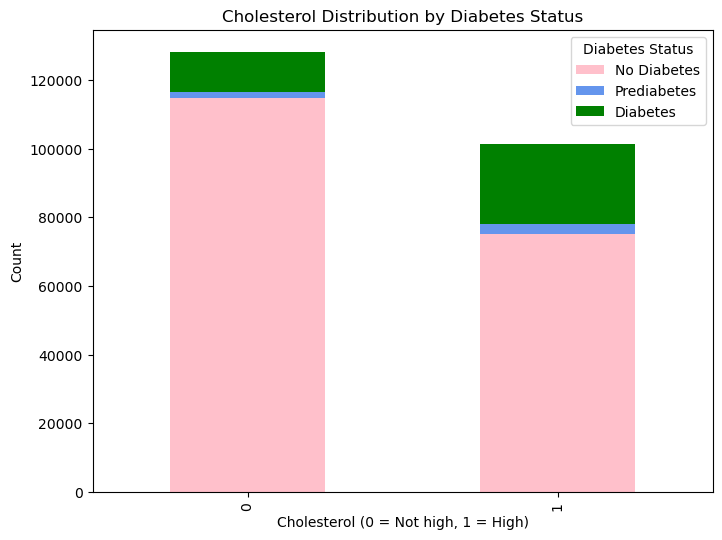

In [11]:
# HighChol vs. Diabetes_012
# Calculate chol per diabetes status
high_chol_count = df.groupby(['HighChol', 'Diabetes_012']).size().unstack()

# Plot a stacked bar plot
high_chol_count.plot(kind = 'bar', stacked = True, figsize = (8, 6), color = ['Pink', 'CornflowerBlue', 'Green'])
plt.title('Cholesterol Distribution by Diabetes Status')
plt.xlabel('Cholesterol (0 = Not high, 1 = High)')
plt.ylabel('Count')
plt.legend(title='Diabetes Status', labels = ['No Diabetes', 'Prediabetes', 'Diabetes'])
plt.show()

# Analysis of Cholesterol Distribution by Diabetes Status
Very similarly to the graph analyzing blood pressure, there is a clear correlation with diabetes and having high cholestoerol. Although there are about 20,000 more people without high cholesterol, the number of people with high cholesterol who have diabetes is at least double that of those without high cholesterol. Therefore, those with high blood pressure are at higher risk of having diabetes,

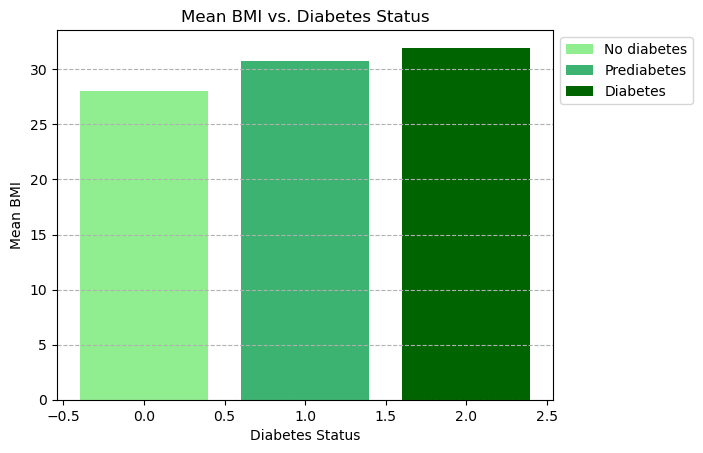

In [12]:
# Calculate the mean BMI for each diabetes category
mean_bmi = df.groupby('Diabetes_012')['BMI'].mean().sort_index()
labels = ["No diabetes", 'Prediabetes', 'Diabetes']
# Create the plot
plt.bar(mean_bmi.index, mean_bmi.values, color = ['LightGreen', 'MediumSeaGreen', 'DarkGreen' ], label = labels)

plt.xlabel('Diabetes Status')
plt.ylabel('Mean BMI')
plt.title('Mean BMI vs. Diabetes Status')
plt.grid(True, axis='y', linestyle='--')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

# Analysis of Mean Body Mass Index Per Diabetes Status
The graph displays the exact results expected regarding diabetes stais. Those without diabetes had the lowest body mass index. The group who are confirmed to have diabetes has the highest body mass index. In between these two groups lies the group with prediabetes, which has less than the group with diabetes but more than those without diabetes. There are clear signs showing that as body mass index increases, so does the chance of diabetes.

# QUESTION 4a: Signficance test

In [13]:
import pandas as pd
import scipy.stats as stats

# t‑test for continuous; x^2 for binary

# Subset to healthy vs. diabetic
df_hd = df[df['Diabetes_012'].isin([0, 2])].copy()
df_hd['Status'] = df_hd['Diabetes_012'].map({0: 'Healthy', 2: 'Diabetic'})

# t‑test on "BMI"
bmi_h = df_hd.loc[df_hd['Status'] == 'Healthy', 'BMI']
bmi_d = df_hd.loc[df_hd['Status'] == 'Diabetic', 'BMI']
t_bmi, p_bmi = stats.ttest_ind(bmi_h, bmi_d, equal_var=False)
# t-test to compare

print(f"BMI t‑test:       t = {t_bmi:.3f}, p = {p_bmi:.4f}")


# "Age" : two‑sample t‑test
age_h = df_hd.loc[df_hd['Status'] == 'Healthy', 'Age']
# age values for healthy individuals

age_d = df_hd.loc[df_hd['Status'] == 'Diabetic', 'Age']
# age values for diabetics
t_age, p_age = stats.ttest_ind(age_h, age_d, equal_var=False)
# t‑test to compare the two age samples

print(f"Age t‑test:       t = {t_age:.3f}, p = {p_age:.4f}")


# 'HighBP' -> chi‑square test
# source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
# https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html
ct_bp = pd.crosstab(df_hd['HighBP'], df_hd['Status'])
chi2_bp, p_bp, _, _ = stats.chi2_contingency(ct_bp)
# chi‑square test bc binary

print(f"HighBP x^2‑test:   x^2 = {chi2_bp:.3f}, p = {p_bp:.4f}")

# "HighChol": x^2‑test
ct_chol = pd.crosstab(df_hd['HighChol'], df_hd['Status'])
chi2_chol, p_chol, _, _ = stats.chi2_contingency(ct_chol)
print(f"HighChol x^2 = {chi2_chol:.3f}, p = {p_chol:.4f}")

# "GenHlth": two‑sample t‑test
gh_h = df_hd.loc[df_hd.Status=='Healthy', 'GenHlth']
gh_d = df_hd.loc[df_hd.Status=='Diabetic','GenHlth']
t_gh, p_gh = stats.ttest_ind(gh_h, gh_d, equal_var=False)
print(f"GenHlth t = {t_gh:.3f}, p = {p_gh:.4f}")

# "PhysHlth": two‑sample t‑test
ph_h = df_hd.loc[df_hd.Status=='Healthy', 'PhysHlth']
ph_d = df_hd.loc[df_hd.Status=='Diabetic','PhysHlth']
t_ph, p_ph = stats.ttest_ind(ph_h, ph_d, equal_var=False)
print(f"PhysHlth t = {t_ph:.3f}, p = {p_ph:.4f}")

BMI t‑test:       t = -93.433, p = 0.0000
Age t‑test:       t = -107.619, p = 0.0000
HighBP x^2‑test:   x^2 = 15263.542, p = 0.0000
HighChol x^2 = 9041.554, p = 0.0000
GenHlth t = -141.493, p = 0.0000
PhysHlth t = -62.921, p = 0.0000


# Explanation
1.

t‑test for continuous; x^2 for binary

All six candidate features show p < 0.001 in the exact tests we covered in class, so none of these patterns could plausibly be due to random chance.

The BMI t‑test (t = –93.43) and Age t‑test (t = –107.62) confirm that diabetic patients are both significantly heavier and older than healthy ones. The GenHlth t‑test (t = –141.49) and PhysHlth t‑test (t = –62.92) show that diabetics report much worse general health and many more days of poor physical health. Finally, the chi‑square tests for HighBP (x^2 = 15,263.54) and HighChol (x^2 = 9,041.55) demonstrate very strong associations between those conditions and diabetes status.

Basically, diabetics in this sample tend to be older, heavier, far more likely to have hypertension and high cholesterol, and to experience worse overall and physical health.

2.

We will use these six for modeling, bc:

Passed a significance test (t‑test for continuous; x^2 for binary).

Captures a clinical dimension of diabetes risk.

BMI -> (Continuous) -> Diabetics have a far higher mean BMI (t = –93.43, p < 0.001)

Age -> (Continuous) -> Diabetics are much older on average (t = –107.62, p < 0.001)

HighBP -> (Binary) -> Strongly associated (x^2 = 15 263.54, p < 0.001)

HighChol -> (Binary) -> Strongly associated (x^2 = 9 041.55, p < 0.001)

GenHlth -> (Continuous) -> Self‑rated health differs greatly (t = –141.49, p < 0.001)

PhysHlth -> (Continuous) -> Days of poor health differ greatly (t = –62.92, p < 0.001)

# QUESTION 4b: Challenge question

In [14]:
# redo -> healthy vs. diabetic subset
df_hd = df[df['Diabetes_012'].isin([0,2])].copy()
df_hd['Status'] = df_hd['Diabetes_012'].map({0:'Healthy', 2:'Diabetic'})

# Feature engineering:    BMI category
#   where 0-25 is normal, 25-30 is overweight, 30+ is obese
bins  = [0, 25, 30, df_hd['BMI'].max()+1]
labels = ['Normal', 'Overweight', 'Obese']
df_hd['BMI_cat'] = pd.cut(df_hd['BMI'], bins=bins, labels=labels, right=False)

# check to see if x^2 test (using chi2_contingency): is BMI category (BMI_cat) associated with diabetes
ct = pd.crosstab(df_hd['BMI_cat'], df_hd['Status'])
chi2, p, _, _ = stats.chi2_contingency(ct)
print(f"BMI_cat x^2 = {chi2:.3f}, p = {p:.4f}")


BMI_cat x^2 = 9425.657, p = 0.0000


## Explanation: 

We turned BMI into three simple groups: Normal, Overweight, and Obese. Creating the new column "BMI_cat" (cat stands for category). The chi‑square test shows this grouping is very strongly linked to diabetes status (x^2 = 9425.657, p < 0.001), meaning obese people are far more likely to be diabetic. 

# QUESTION 5: Partion the data

In [15]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [16]:
# define variables X is every feature but Diabetes_012
X = df.drop("Diabetes_012", axis=1)
y = df["Diabetes_012"]

# train the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=7,
                                                    stratify=y
                                                   )


In [17]:
# encode categorical data
encoded_data = LabelEncoder()

# train the encoded data
y_train = encoded_data.fit_transform(y_train)
y_test = encoded_data.transform(y_test)


In [18]:
# normalize data
scaler = StandardScaler()
scaler.fit(X_train[["BMI", "Age", "Income", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk"]])

# transform the data
X_train[["BMI", "Age", "Income", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk"]] = scaler.transform(
    X_train[["BMI", "Age", "Income", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk"]])

X_test[["BMI", "Age", "Income", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk"]]= scaler.transform(
    X_test[["BMI", "Age", "Income", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk"]])

# fit the data
X_train_scaled =  X_train[["BMI", "Age", "Income", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk"]]
X_test_scaled = X_test[["BMI", "Age", "Income", "GenHlth", "MentHlth", "PhysHlth", "DiffWalk"]]

# QUESTION 6: Build the ML model

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

## SVM

In [20]:
# SVM Model
svc = SVC()

train_df = X_train_scaled.copy()
train_df['target'] = y_train

# 500 row sample size to make the data set managable with .fit and the algorithms
train_sample = train_df.sample(n=500, random_state=42)
X_sample = train_sample.drop("target", axis=1)
y_sample = train_sample["target"]

#parameter grid, nonlinear data
param_grid = {'C': [1, 10],'gamma': ['scale', 0.1], 'kernel': ['rbf']}

svc_grid = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, n_jobs=-1)
svc_grid.fit(X_sample, y_sample)


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10], 'gamma': ['scale', 0.1],
                         'kernel': ['rbf']})

## RandomForest Classifier Model

In [21]:
# RandomForest Classifier Model
rf_param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
rf_model = RandomForestClassifier(random_state=42)

rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 200]})

## KNN Model

In [22]:
# KNN Model
knn = KNeighborsClassifier()

knn_param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23],
    'weights': ['uniform', 'distance']}

knn_grid = GridSearchCV(estimator=knn, param_grid=knn_param_grid, cv=3, n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                         23],
                         'weights': ['uniform', 'distance']})

# QUESTION 7: Analyze the model

## SVM

In [23]:
# SVM best sample
best_svc = svc_grid.best_estimator_
best_svc.fit(X_sample, y_sample)
y_pred_best = best_svc.predict(X_test_scaled)

# Calculate and evaluate/accuracy
svm_accuracy = best_svc.score(X_test_scaled, y_test) * 100
print("SVM set accuracy: " + str(round(svm_accuracy, 2)) + "%")

print(f"SVM best model is: {best_svc}")

SVM set accuracy: 82.45%
SVM best model is: SVC(C=1)


In [24]:
# SVM classification report
target_names = ['No Diabetes', 'Prediabetes', 'Diabetes']
print(f"SVM Classification Report: {classification_report(y_test, y_pred_best, target_names=target_names)}")

SVM Classification Report:               precision    recall  f1-score   support

 No Diabetes       0.84      0.98      0.90     57017
 Prediabetes       0.00      0.00      0.00      1389
    Diabetes       0.44      0.10      0.16     10529

    accuracy                           0.82     68935
   macro avg       0.43      0.36      0.36     68935
weighted avg       0.76      0.82      0.77     68935



/Users/julianneconlee/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/julianneconlee/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/julianneconlee/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
print("Training score:", round(svc_grid.best_score_,2))
score = best_svc.score(X_test_scaled, y_test)
print("Test score:", round(score,2))

Training score: 0.83
Test score: 0.82


The model has a training score of 0.83 and a test score of 0.82. Since both scores are relatively similar and high, we can generalize that the model is perfoming well with little bias.

However, when analyzing healthcare accuracy gives a general idea to whether the model is performing well, but recall is an important indicator of whether the model performs well since it is used to minimize false negatives. For the classification report, the recall had a very high value for no diabetes of 0.98 which indicates the model is performing very well. However, we notice that for pre-diabetes and diabetes the metric is not performing that well. 

Another indication can be the precision score. The precision score highlights how many of the predicted positives were actually correct which helps minimize false positives. For SVM, the precision score was 0.84 for healthy, and 0.44 for diabetes. This means 44% of the people predicted to have diabetes actually had diabetes. A precision of 0 for pre-diabetes indicates the model couldn't predict anyone with diabetes which could indicate false negatives.

## RF

In [26]:
# RF best sample
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

rf_accuracy = best_rf.score(X_test_scaled, y_test) * 100
print("RandomForest accuracy: " + str(round(rf_accuracy, 2)) + "%")
print(f"RF best model is: {best_rf}")

RandomForest accuracy: 83.02%
RF best model is: RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)


In [27]:
# ReandomForest classification report
target_names = ['No Diabetes', 'Prediabetes', 'Diabetes']
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=target_names))

Classification Report (Random Forest):
              precision    recall  f1-score   support

 No Diabetes       0.84      0.99      0.91     57017
 Prediabetes       0.00      0.00      0.00      1389
    Diabetes       0.54      0.09      0.15     10529

    accuracy                           0.83     68935
   macro avg       0.46      0.36      0.35     68935
weighted avg       0.78      0.83      0.77     68935



/Users/julianneconlee/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/julianneconlee/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/julianneconlee/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
print("Training score:", round(rf_grid.best_score_,3))
score = best_rf.score(X_test_scaled, y_test)
print("Test score:", round(score,3))

Training score: 0.831
Test score: 0.83


The model had a training score of 0.831 and a test score of 0.830 as well. Since the training and test scores have a 0.001 difference and are relatively high, we can conclude the model is well-tuned. 

Additionally, looking at the classification report, the recall score for no diabetes was 0.99, which out perfomed the last SVM model. However, had a lower score for diabetes of 0.09, and the same score of 0 for pre-diabetes. For a recall score to be 0 or 0.09 that indicates the model is missing roughly 0.91 of actual diabetes cases which is a a big concern for patients who are at risk of diabetes.

For the precision scores, the RF slightly outperformed the SVM model by correctly identifying 54% of people with diabetes. However, it is still concerning that the pre-diabetes had a precision score of 0. 

## KNN

In [29]:
#KNN best sample
best_knn = knn_grid.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

# KNN model accuracy
knn_accuracy = round(best_knn.score(X_test_scaled, y_test) * 100, 2)
print("KNN accuracy: " + str(knn_accuracy) + "%")
print(f"KNN best model is: {best_knn}")

KNN accuracy: 82.68%
KNN best model is: KNeighborsClassifier(n_neighbors=23)


In [30]:
# KNN classification report
target_names = ['No Diabetes', 'Prediabetes', 'Diabetes']
print(f"KNN classification report: {classification_report(y_test, y_pred_knn, target_names=target_names)}")

KNN classification report:               precision    recall  f1-score   support

 No Diabetes       0.84      0.98      0.90     57017
 Prediabetes       0.00      0.00      0.00      1389
    Diabetes       0.48      0.13      0.20     10529

    accuracy                           0.83     68935
   macro avg       0.44      0.37      0.37     68935
weighted avg       0.77      0.83      0.78     68935



/Users/julianneconlee/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/julianneconlee/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/julianneconlee/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
print("Training score:", round(knn_grid.best_score_,3))
test_score = best_knn.score(X_test_scaled, y_test)
print("Test score:", round(test_score,3))

Training score: 0.828
Test score: 0.827


The KNN model had a training score of 0.828 and a test score of 0.827. Similarly, to the last models, since the score is only 0.001 off and relatively high we can conclude that the model has low bias-variance.

From the classification report, the model had a high recall score for no diabetes, and similarly had a score of 0 for pre-diabetes. As for diabetes it still was pretty bad at missing predictions of patients with diabetes, however, was slightly better than the other models. The recall scores may of been a potential problem from class imbalances, where there are far fewer data values of pre-diabetes and diabetes opposed to healthy patients. This can make the model bias to the majority and cause issues with the general quality of the model. 

For precision, the KNN model performed similarly to the SVM model for healthy (no diabetes), pre-diabetes, and diabetes. It still remains an issue that all three of the models had 0 for both precision and recall values.

# QUESTION 8: Discuss the potential impacts of your solution

1. Discuss the potential impacts of your solution. Who will benefit from your solution and why.

The dataset analyzes risk factors that influence the prevalence of diabetes and to create a model that determines whether a patient is diabetic, prediabetic, or healthy. This model has positive implications for patients to understand if they are at risk of diabetes or currently have pre-diabetic risk factors. This could also help providers to understand if patients are at risk and whether they should take action



2. Were there any concerns of bias in the ML modeling seeing that you were analyzing sensitive data? 

There are some concerns of bias in the ML modeling in terms of relevant factors in the dataset. The dataset does not include factors like race, location, socio-economic background and therefore might underrepresent certain groups of individuals while overrepresenting another group which can in turn lead to disparities in predictions and the model's overall performance. Additionally, there may of been an imbalance of data for pre-diabetes patients. The classification results gave 0 for all models for prediabetes since there are way fewer data values for pre-diabetes as opposed to healthy and diabetes. This type of imbalance can lead to bias in the model's ability to make accurate predictions.

There may be bias with gender and income.


In [32]:
# gender bias
gender = df.loc[X_test.index, "Sex"]
gender_df = pd.DataFrame({
    "actual": y_test,
    "predicted": y_pred_rf,
    "gender": gender
})

# group gender and predicted values together 
predicted_gender = gender_df.groupby(["gender", "predicted"]).size()
print(predicted_gender)

gender  predicted
0       0            37706
        2             1185
1       0            29509
        2              535
dtype: int64


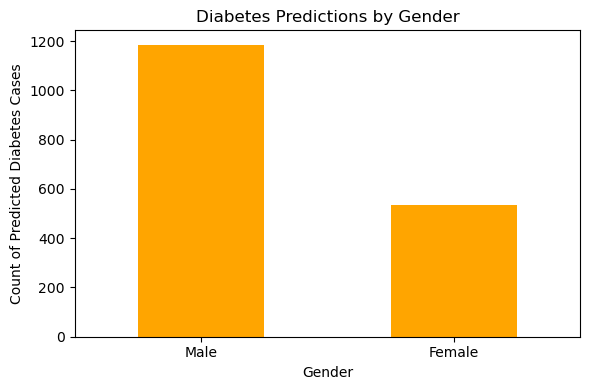

In [33]:
# find data for just diabetes 
diabetes = gender_df[gender_df["predicted"] == 2]

# Group by gender and count
diabetes_counts = diabetes["gender"].value_counts().sort_index()
diabetes_counts.index = ["Male", "Female"]

# Plot
diabetes_counts.plot(kind='bar', color='orange', figsize=(6, 4))
plt.title("Diabetes Predictions by Gender")
plt.xlabel("Gender")
plt.ylabel("Count of Predicted Diabetes Cases")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

The graph of diabetes predictions by gender indicate the males were over two times more likely to be predicted to have diabetes compared to females.  

In [34]:
# income bias 
income = df.loc[X_test.index, "Income"]
income_df = pd.DataFrame({
    "actual": y_test,
    "predicted": y_pred_rf,
    "income": income
})

# group data into new column
predicted_income = income_df.groupby(["income", "predicted"]).size().unstack()
print(predicted_income)

predicted      0    2
income               
1           2644  273
2           3154  325
3           4546  305
4           5706  268
5           7379  193
6          10298  141
7          11916  115
8          21572  100


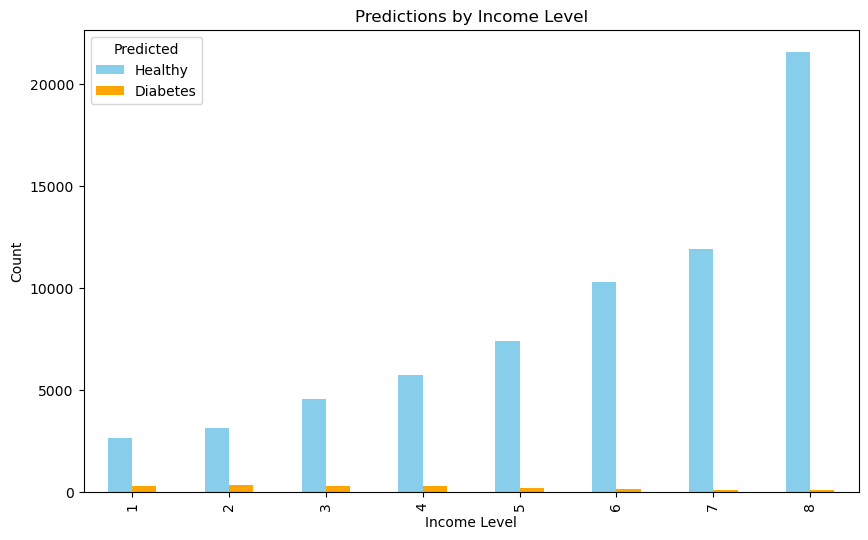

In [35]:
predicted_income.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'orange'])
plt.title("Predictions by Income Level")
plt.xlabel("Income Level")
plt.ylabel("Count")
plt.legend(title="Predicted", labels=["Healthy", "Diabetes"])
plt.show()

The income analysis indicates that as the income level increases, we tend to see healthier predictions, as opposed to lower incomes. Lower incomes had the lowest predictions for healthy predictions and had the highest prediction of diabetes, and vice versa for the highest income. This indicates there might be an income-based bias in that the model is underpredicting diabetes in higher income groups. 

Some techiques/suggestions to adjust the gender bias and income bias could be reviewing the data to ensure that is balanced. The data pool might of collected more data from one feature over the other (more males than females in the study, or more lower income cases). By reviewing the data for underrepresentation or overrepresentation it may leviate a lot of the potential bias we found in this model.